In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

## Nomor 1

Text(0.5, 1.0, 'Grayscale Image')

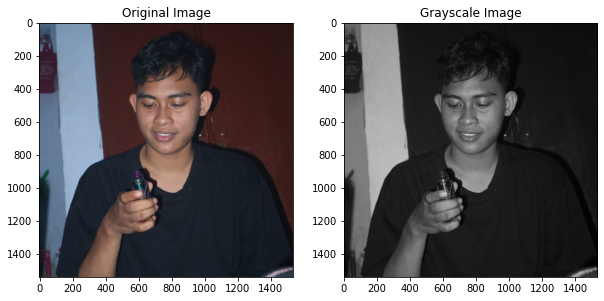

In [2]:
myImage = plt.imread('Dhira.jpeg')
grayImage = cv.cvtColor(myImage,cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(myImage)
ax[0].set_title('Original Image')
ax[1].imshow(grayImage, cmap="gray")
ax[1].set_title('Grayscale Image')

## Nomor 2

Text(0.5, 1.0, 'Normalisasi Image')

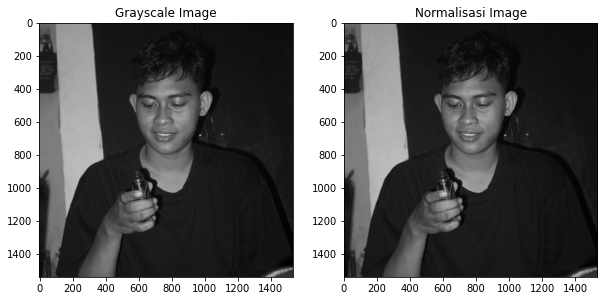

In [3]:
height,width= grayImage.shape

nilai_min = grayImage.min()
nilai_max = grayImage.max()
nilai_range = nilai_max-nilai_min

imgNormSkala = np.zeros((height,width)).astype(int)


for i in range(height):
    for j in range(width):
        imgNormSkala[i][j] = ((grayImage[i][j]-nilai_min)/nilai_range)*255

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(grayImage, cmap="gray")
ax[0].set_title('Grayscale Image')
ax[1].imshow(imgNormSkala, cmap="gray")
ax[1].set_title('Normalisasi Image')


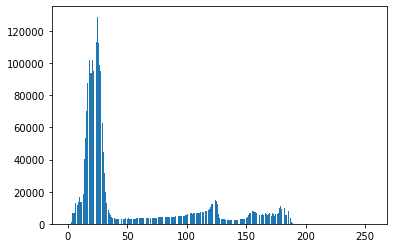

In [4]:
def imgHist(image, imagebit):
    sumGray = np.zeros(2**imagebit)
    tinggi,lebar = image.shape
    for i in range(tinggi):
        for j in range(lebar):
            grayValue = image[i][j]
            sumGray[grayValue] += 1
    plt.bar([i for i in range(256)],sumGray)
    plt.show()
imgHist(imgNormSkala,8)

## Nomor 3

### a. Translasi

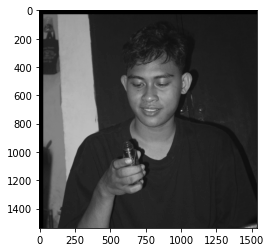

In [5]:
transImg = np.zeros(grayImage.shape).astype(int)
x=30
y=-40
y=np.abs(x)
for i in range(grayImage.shape[0]-x):
    for j in range (grayImage.shape[1]-y):
            transImg[i+x,j+y] = grayImage[i,j]

plt.imshow(transImg, cmap="gray")


### b. Rotasi

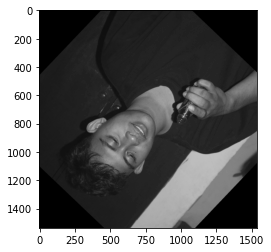

In [6]:
angle = 117
cos = (np.cos(angle))
sin = (np.sin(angle))
center_x = grayImage.shape[0]//2
center_y = grayImage.shape[1]//2
rotImage = np.zeros(grayImage.shape).astype(int)
for i in range(grayImage.shape[0]):
    for j in range(grayImage.shape[1]):
        x2 = int((i - center_x) * cos - (j - center_y) * sin + center_x)
        y2 = int((i - center_x) * sin + (j - center_y) * cos + center_y)
        if 0 <= x2 < grayImage.shape[0] and 0 <= y2 < grayImage.shape[1]:
            rotImage[i][j]=grayImage[x2][y2]
plt.imshow(rotImage,cmap="gray")


### c. Refleksi Sumbu X

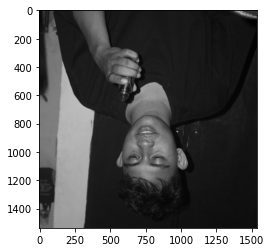

In [7]:
mirXImage = np.zeros(grayImage.shape).astype(int)
for i in range(grayImage.shape[0]):
    for j in range(grayImage.shape[1]):
        mirXImage[i,j] = grayImage [grayImage.shape[0]-1-i][j]
plt.imshow(mirXImage, cmap="gray")

### d. Dilatasi Skala -3

In [8]:
def dilatasi(image, skala):
    skala2=np.abs(skala)
    tinggi,lebar = image.shape
    if(skala<0):
        skala=(1/np.abs(skala))
    else:
        tinggi = tinggi*skala2
        lebar = lebar*skala2

    result = np.zeros([tinggi, lebar]).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for x in range(int(i*skala), int(i*skala)+skala2):
                for y in range(int(j*skala), int(j*skala)+skala2):
                    result[x][y] = image[i][j]
    return result




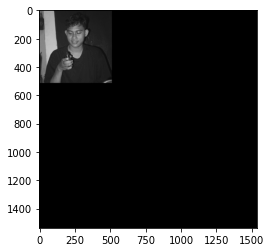

In [9]:
dilIMG = dilatasi(grayImage,-3)
plt.imshow(dilIMG,cmap="gray")


### e. Citra negatif

Text(0.5, 1.0, 'Negative Image')

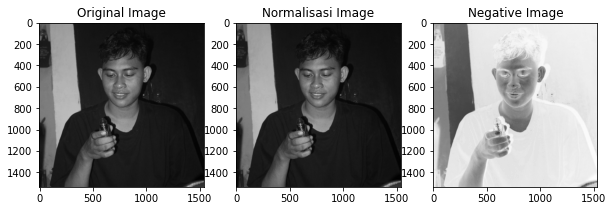

In [10]:
negaImage = np.zeros(grayImage.shape).astype(int)
for i in range(grayImage.shape[0]):
    for j in range(grayImage.shape[1]):
        negaImage[i,j]= ~grayImage[i,j]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax[0].imshow(grayImage, cmap="gray")
ax[0].set_title('Original Image')
ax[1].imshow(imgNormSkala, cmap="gray")
ax[1].set_title('Normalisasi Image')
ax[2].imshow(negaImage, cmap="gray")
ax[2].set_title('Negative Image')

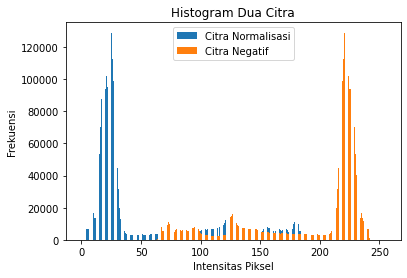

In [11]:
sumGray = np.zeros(256).astype(int)  
sumNegative = np.zeros(256).astype(int)  
for i in range(imgNormSkala.shape[0]):  
    for j in range(imgNormSkala.shape[1]):  
        grayValue = imgNormSkala[i][j]  
        negativeValue = negaImage[i][j]  
        sumGray[grayValue] +=1  
        sumNegative[negativeValue] +=1  
fig,ax=plt.subplots()  
bar1 = ax.bar([i for i in range(256)], sumGray,0.5, label = 'Citra Normalisasi')  
bar2 = ax.bar([i for i in range(256)], sumNegative,0.5, label = 'Citra Negatif')  
ax.set_title('Histogram Dua Citra')  
ax.set_xlabel('Intensitas Piksel')  
ax.set_ylabel('Frekuensi')  
ax.legend()  
plt.show()  
